## Analyzing Observations as a Percentage of Volume
***
We wish to investigate obervations as a percentage of volume, grouped by each hour over 24 hours. This is done by finding the mean `obs` value per hour across 5 days (weekdays), doing the same for `volume`, and then creating a fraction with these averages to represent a sort of percentage indicator.

<br>
We will do this for the following segments:
* Front from Bathurst to Spadina
* Front from Spadina to Bathurst
* Adelaide from Bathurst to Spadina
* Richmond from Spadina to Bathurst

In [150]:
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# connect to database
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\Users\alouis2\Documents\Python Scripts\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

### Front Eastbound (Bathurst to Spadina)
***

The data grabbed in this query runs from November 1th, 2017 to November 8th, 2017, minus the 4th and 5th because they are part of the weekend. 

In [163]:
query = open('front_percentage.sql', 'r',  encoding='utf-8-sig')
fronteb = pd.read_sql_query(query.read(),con)

We create a new column in the dataframe called `percentage`, which will contain obs/volume values. Below are the average bluetooth observations, volumes, and percentages for each hour across 24 hours. 

In [164]:
fronteb['percentage'] = fronteb['obs']/fronteb['volume']
fronteb

,datetime_bin,obs,volume,percentage
0,00:00:00,4.75,127.00,0.037402
1,01:00:00,5.00,92.50,0.054054
2,02:00:00,4.50,80.25,0.056075
3,03:00:00,3.25,54.75,0.059361
4,04:00:00,3.25,37.25,0.087248
5,05:00:00,4.75,82.25,0.057751
6,06:00:00,16.75,270.75,0.061865
7,07:00:00,39.75,476.00,0.083508
8,08:00:00,41.40,608.60,0.068025
9,09:00:00,44.80,568.40,0.078818


We plot this percentage value over these time bins. 

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


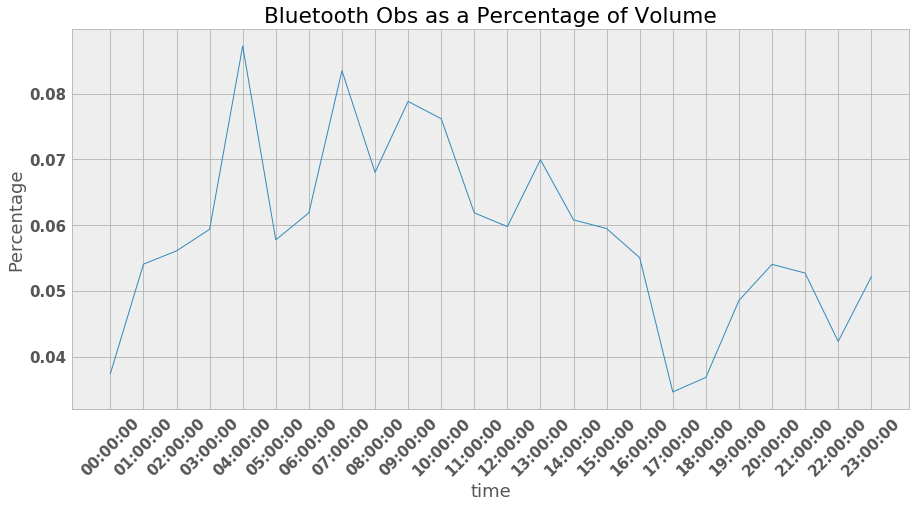

In [153]:
plt.figure(figsize = (15,7))
plt.plot(fronteb['datetime_bin'], fronteb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

### Front Westbound (Spadina to Bathurst)
***

The data grabbed in this query runs from November 1th, 2017 to November 8th, 2017, minus the 4th and 5th because they are part of the weekend.


In [154]:
query = open('front_wbpercentage.sql', 'r',  encoding='utf-8-sig')
frontwb = pd.read_sql_query(query.read(),con)

In [155]:
frontwb['percentage'] = frontwb['obs']/frontwb['volume']
frontwb

,datetime_bin,obs,volume,percentage
0,00:00:00,5.00,95.250000,0.052493
1,01:00:00,5.75,63.000000,0.091270
2,02:00:00,4.25,48.500000,0.087629
3,03:00:00,2.00,34.333333,0.058252
4,04:00:00,2.00,24.666667,0.081081
5,05:00:00,1.75,39.750000,0.044025
6,06:00:00,6.50,90.000000,0.072222
7,07:00:00,10.00,161.000000,0.062112
8,08:00:00,11.80,217.600000,0.054228
9,09:00:00,8.80,221.600000,0.039711


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


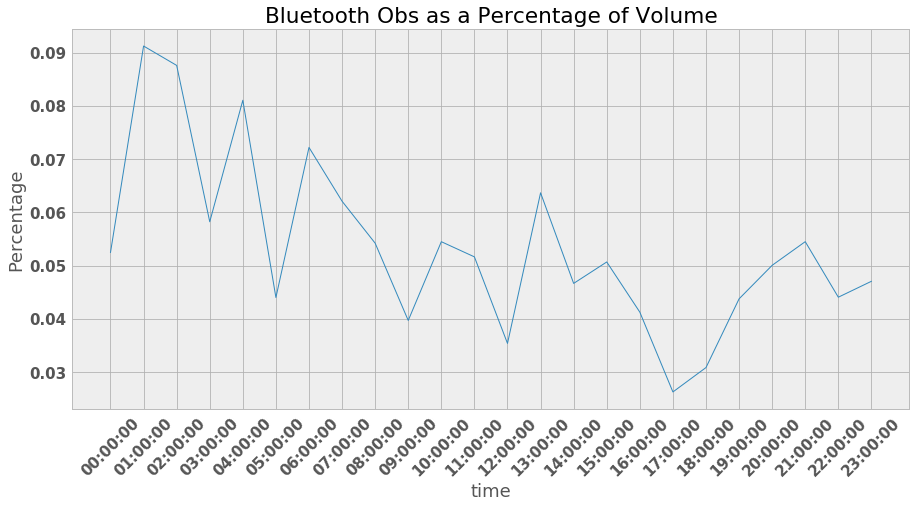

In [156]:
plt.figure(figsize = (15,7))
plt.plot(frontwb['datetime_bin'], frontwb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

### Adelaide Eastbound (Bathurst to Spadina)
***

The data grabbed in this query runs from December 4th, 2017 to December 8th, 2017.

In [157]:
query = open('adelaide_percentage.sql', 'r',  encoding='utf-8-sig')
adelaideeb = pd.read_sql_query(query.read(),con)
adelaideeb['percentage'] = adelaideeb['obs']/adelaideeb['volume']

In [158]:
adelaideeb

,datetime_bin,obs,volume,percentage
0,00:00:00,9.000000,359.500000,0.025035
1,01:00:00,6.000000,334.000000,0.017964
2,02:00:00,7.500000,277.500000,0.027027
3,03:00:00,3.500000,166.807692,0.020982
4,04:00:00,6.000000,58.000000,0.103448
5,05:00:00,8.000000,125.000000,0.064000
6,06:00:00,31.400000,441.600000,0.071105
7,07:00:00,38.400000,768.400000,0.049974
8,08:00:00,49.000000,978.600000,0.050072
9,09:00:00,37.000000,916.800000,0.040358


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


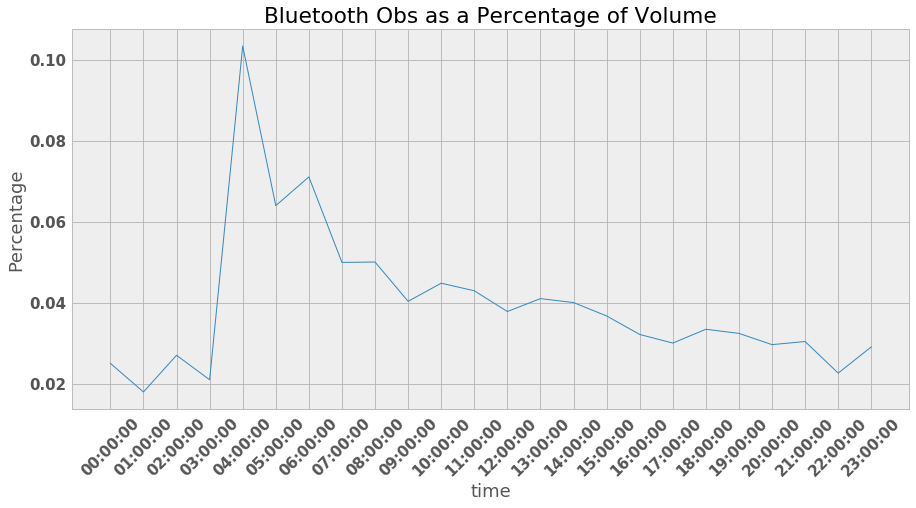

In [159]:
plt.figure(figsize = (15,7))
plt.plot(adelaideeb['datetime_bin'], adelaideeb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()

### Richmond Westbound (Spadina to Bathurst)

The data grabbed in this query runs from December 4th, 2017 to December 8th, 2017.

In [160]:
query = open('richmond_wbpercentage.sql', 'r',  encoding='utf-8-sig')
richmondwb = pd.read_sql_query(query.read(),con)
richmondwb['percentage'] = richmondwb['obs']/richmondwb['volume']

In [161]:
richmondwb

,datetime_bin,obs,volume,percentage
0,00:00:00,6.500000,240.000000,0.027083
1,01:00:00,9.500000,179.500000,0.052925
2,02:00:00,4.500000,141.000000,0.031915
3,03:00:00,2.500000,72.500000,0.034483
4,05:00:00,4.000000,59.000000,0.067797
5,06:00:00,5.400000,112.400000,0.048043
6,07:00:00,12.400000,257.400000,0.048174
7,08:00:00,11.800000,342.600000,0.034442
8,09:00:00,13.000000,345.200000,0.037659
9,10:00:00,10.800000,349.200000,0.030928


C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


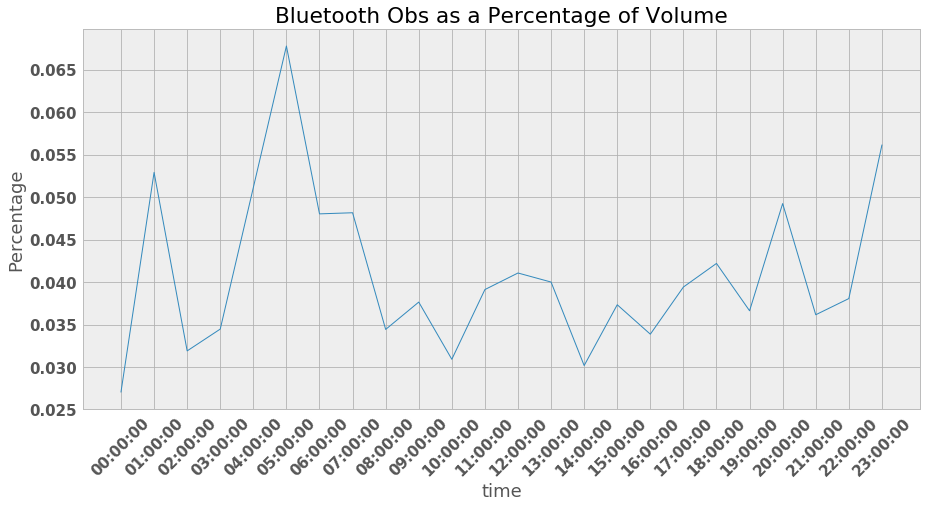

In [162]:
plt.figure(figsize = (15,7))
plt.plot(richmondwb['datetime_bin'], richmondwb['percentage'])
plt.title('Bluetooth Obs as a Percentage of Volume')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
base = datetime.time(0,0)
l = [base]
for i in range(0, 23):
    base = (datetime.datetime.combine(datetime.date(1, 1, 1), base) + datetime.timedelta(minutes=60)).time()
    l.append(base)
plt.axes().get_xaxis().set_ticks(l)
plt.xticks(rotation = 45)
plt.ylabel('Percentage')
plt.show()